In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [5]:
from scipy import stats
from scipy.stats import skew,norm

In [6]:
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn = ignore_warn

In [237]:
import os

In [253]:
data = pd.read_csv('House_prediction.csv')

In [17]:
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


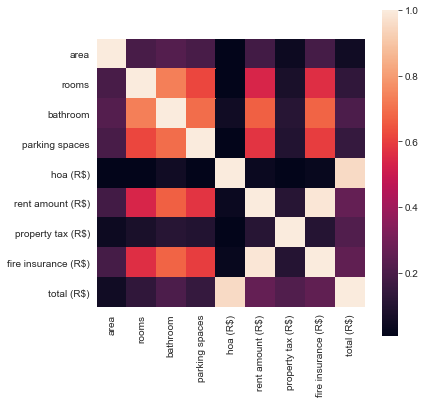

In [25]:
corrmat = data.corr()
#print(corrmat)
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(corrmat,square=True)

As it is seen from the correlation map, fire insurance and rent amount show very high correlation. Also, rent amount(or fire insurance) shows good coorelation with bathrooms and rooms. Also, hoa is highly correlated  to total amount, as expected.

In [28]:
#Checking for missing data
data_missing = (data.isnull().sum()/len(data)) * 100
data_missing = data_missing.drop(data_missing[data_missing==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':data_missing})
missing_data

,Missing Percentage


As we can see, there is no missing data, so we do not need to eliminate any columns or rows.

In [70]:
data[['floor']] = data[['floor']].replace(['-'], ['0'])
#replacing - values in floor with 0

<Figure size 432x288 with 0 Axes>

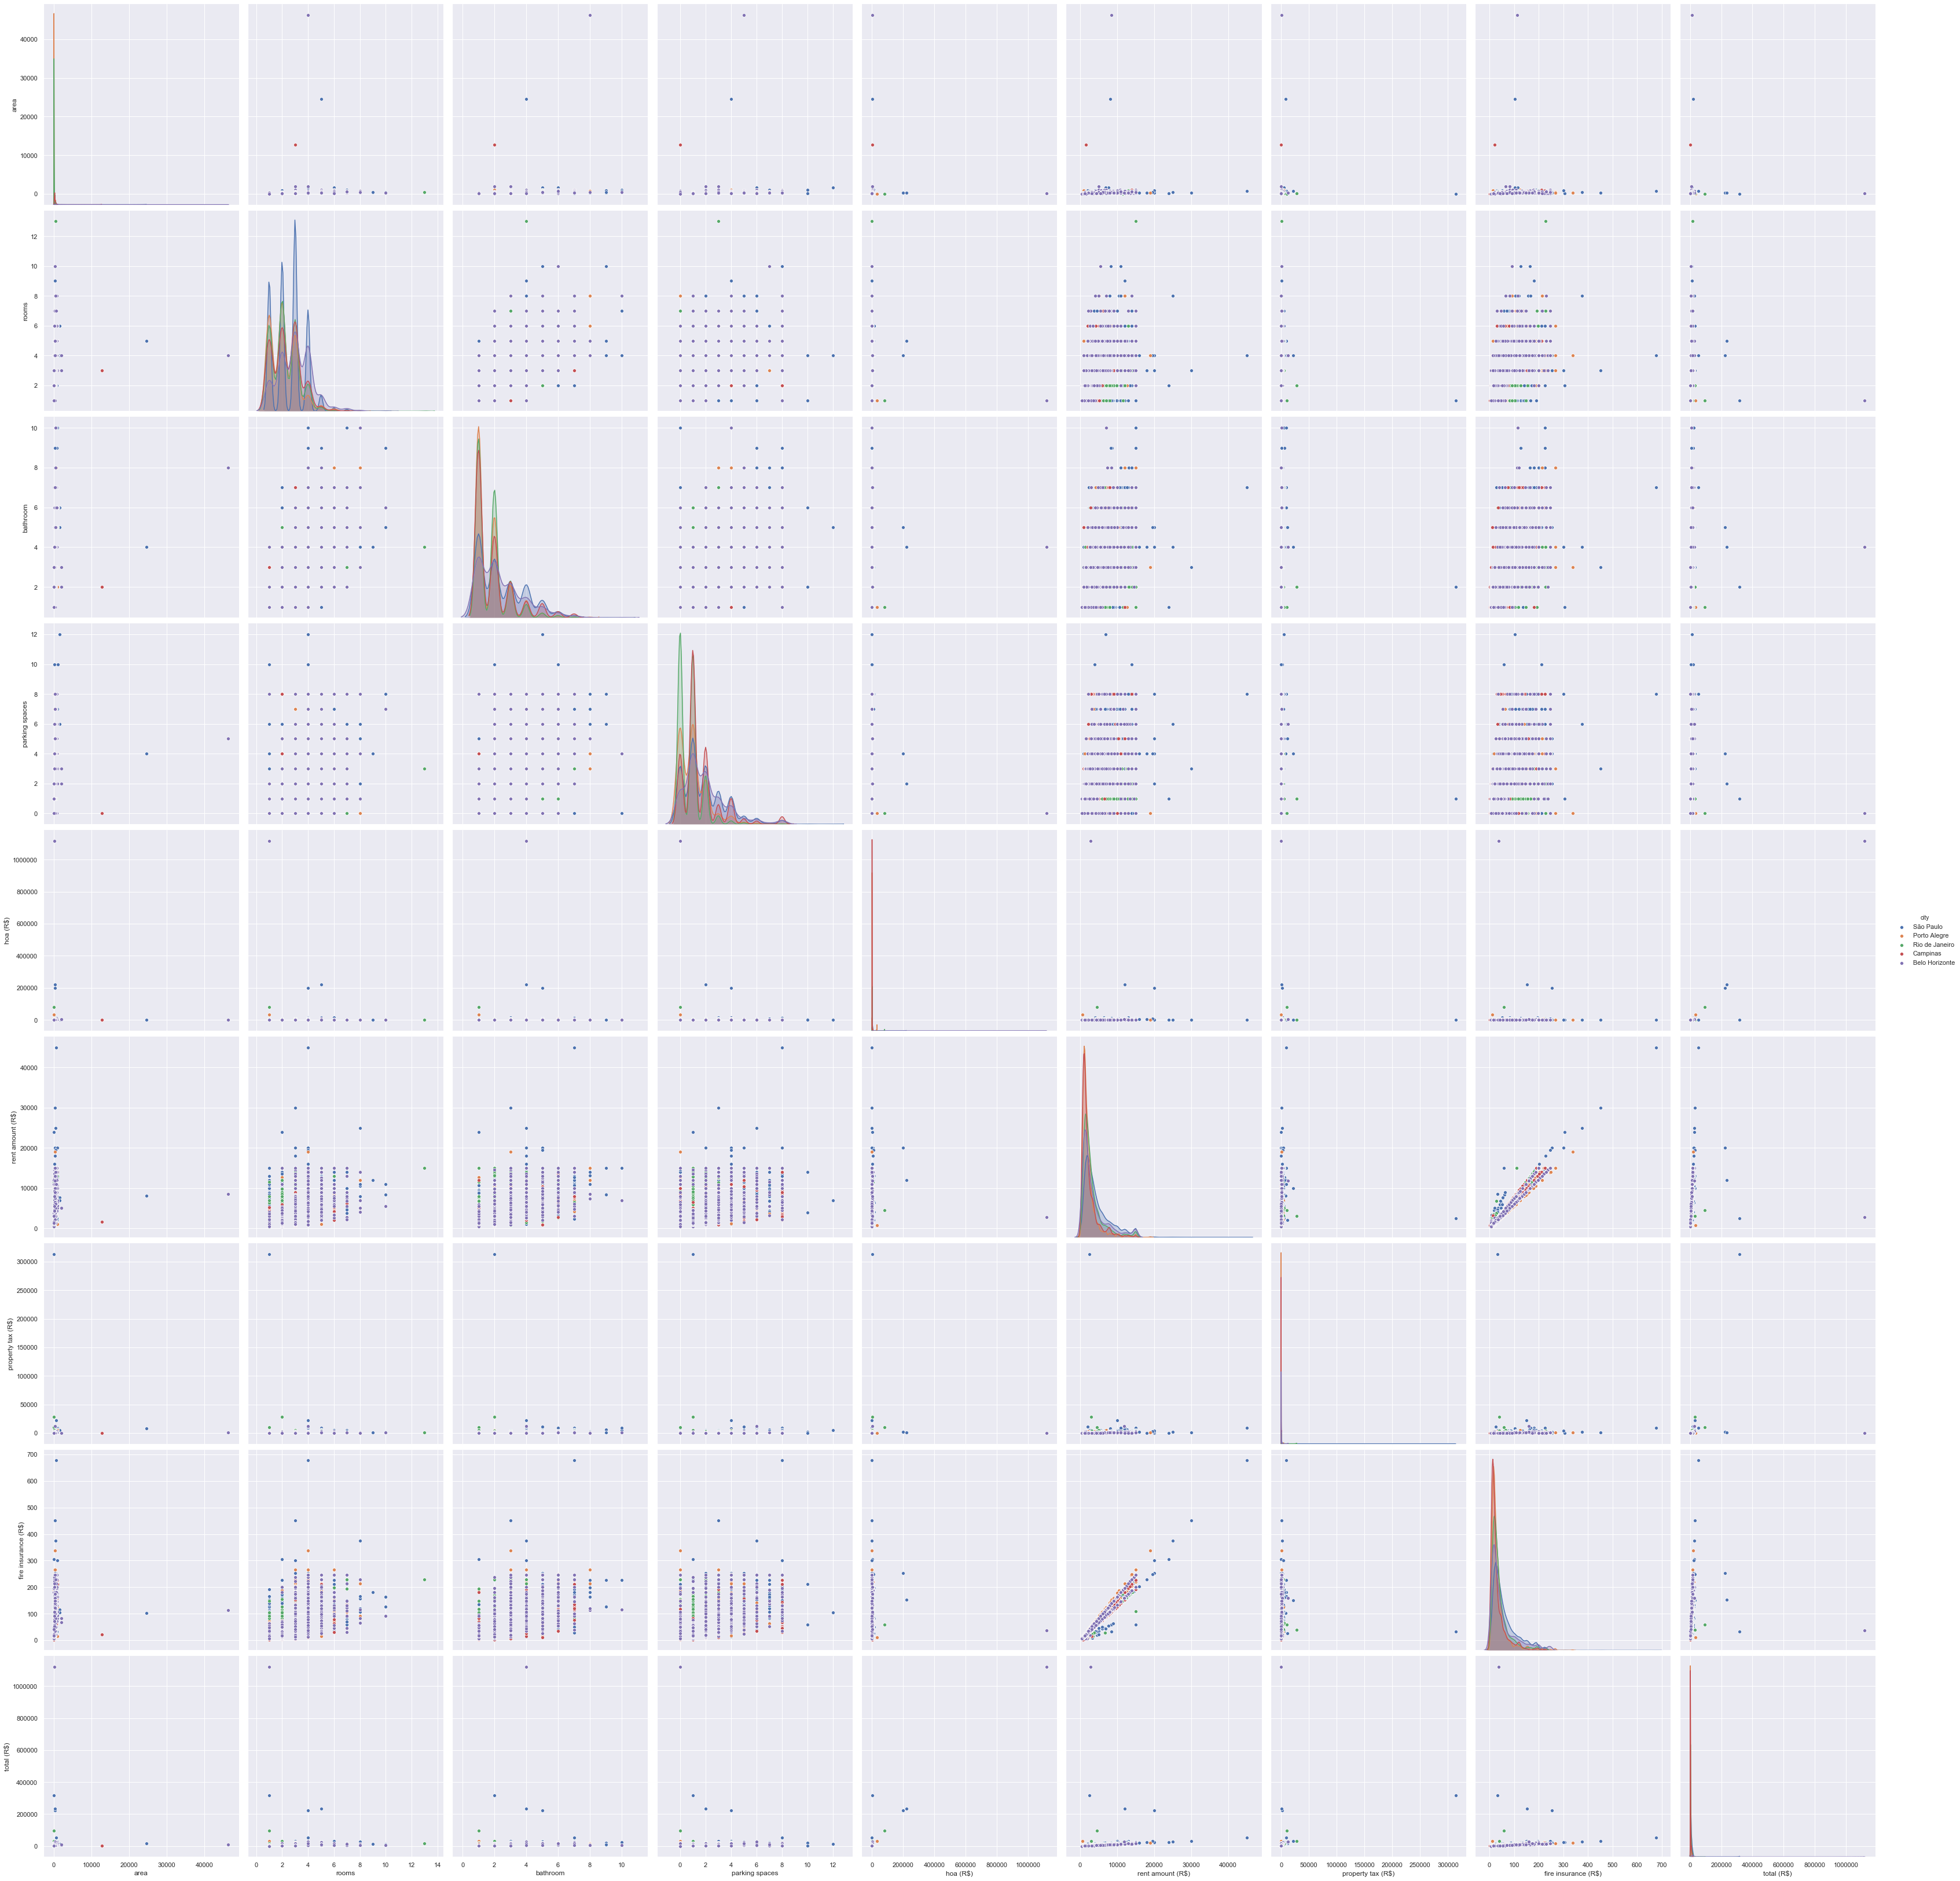

<Figure size 432x288 with 0 Axes>

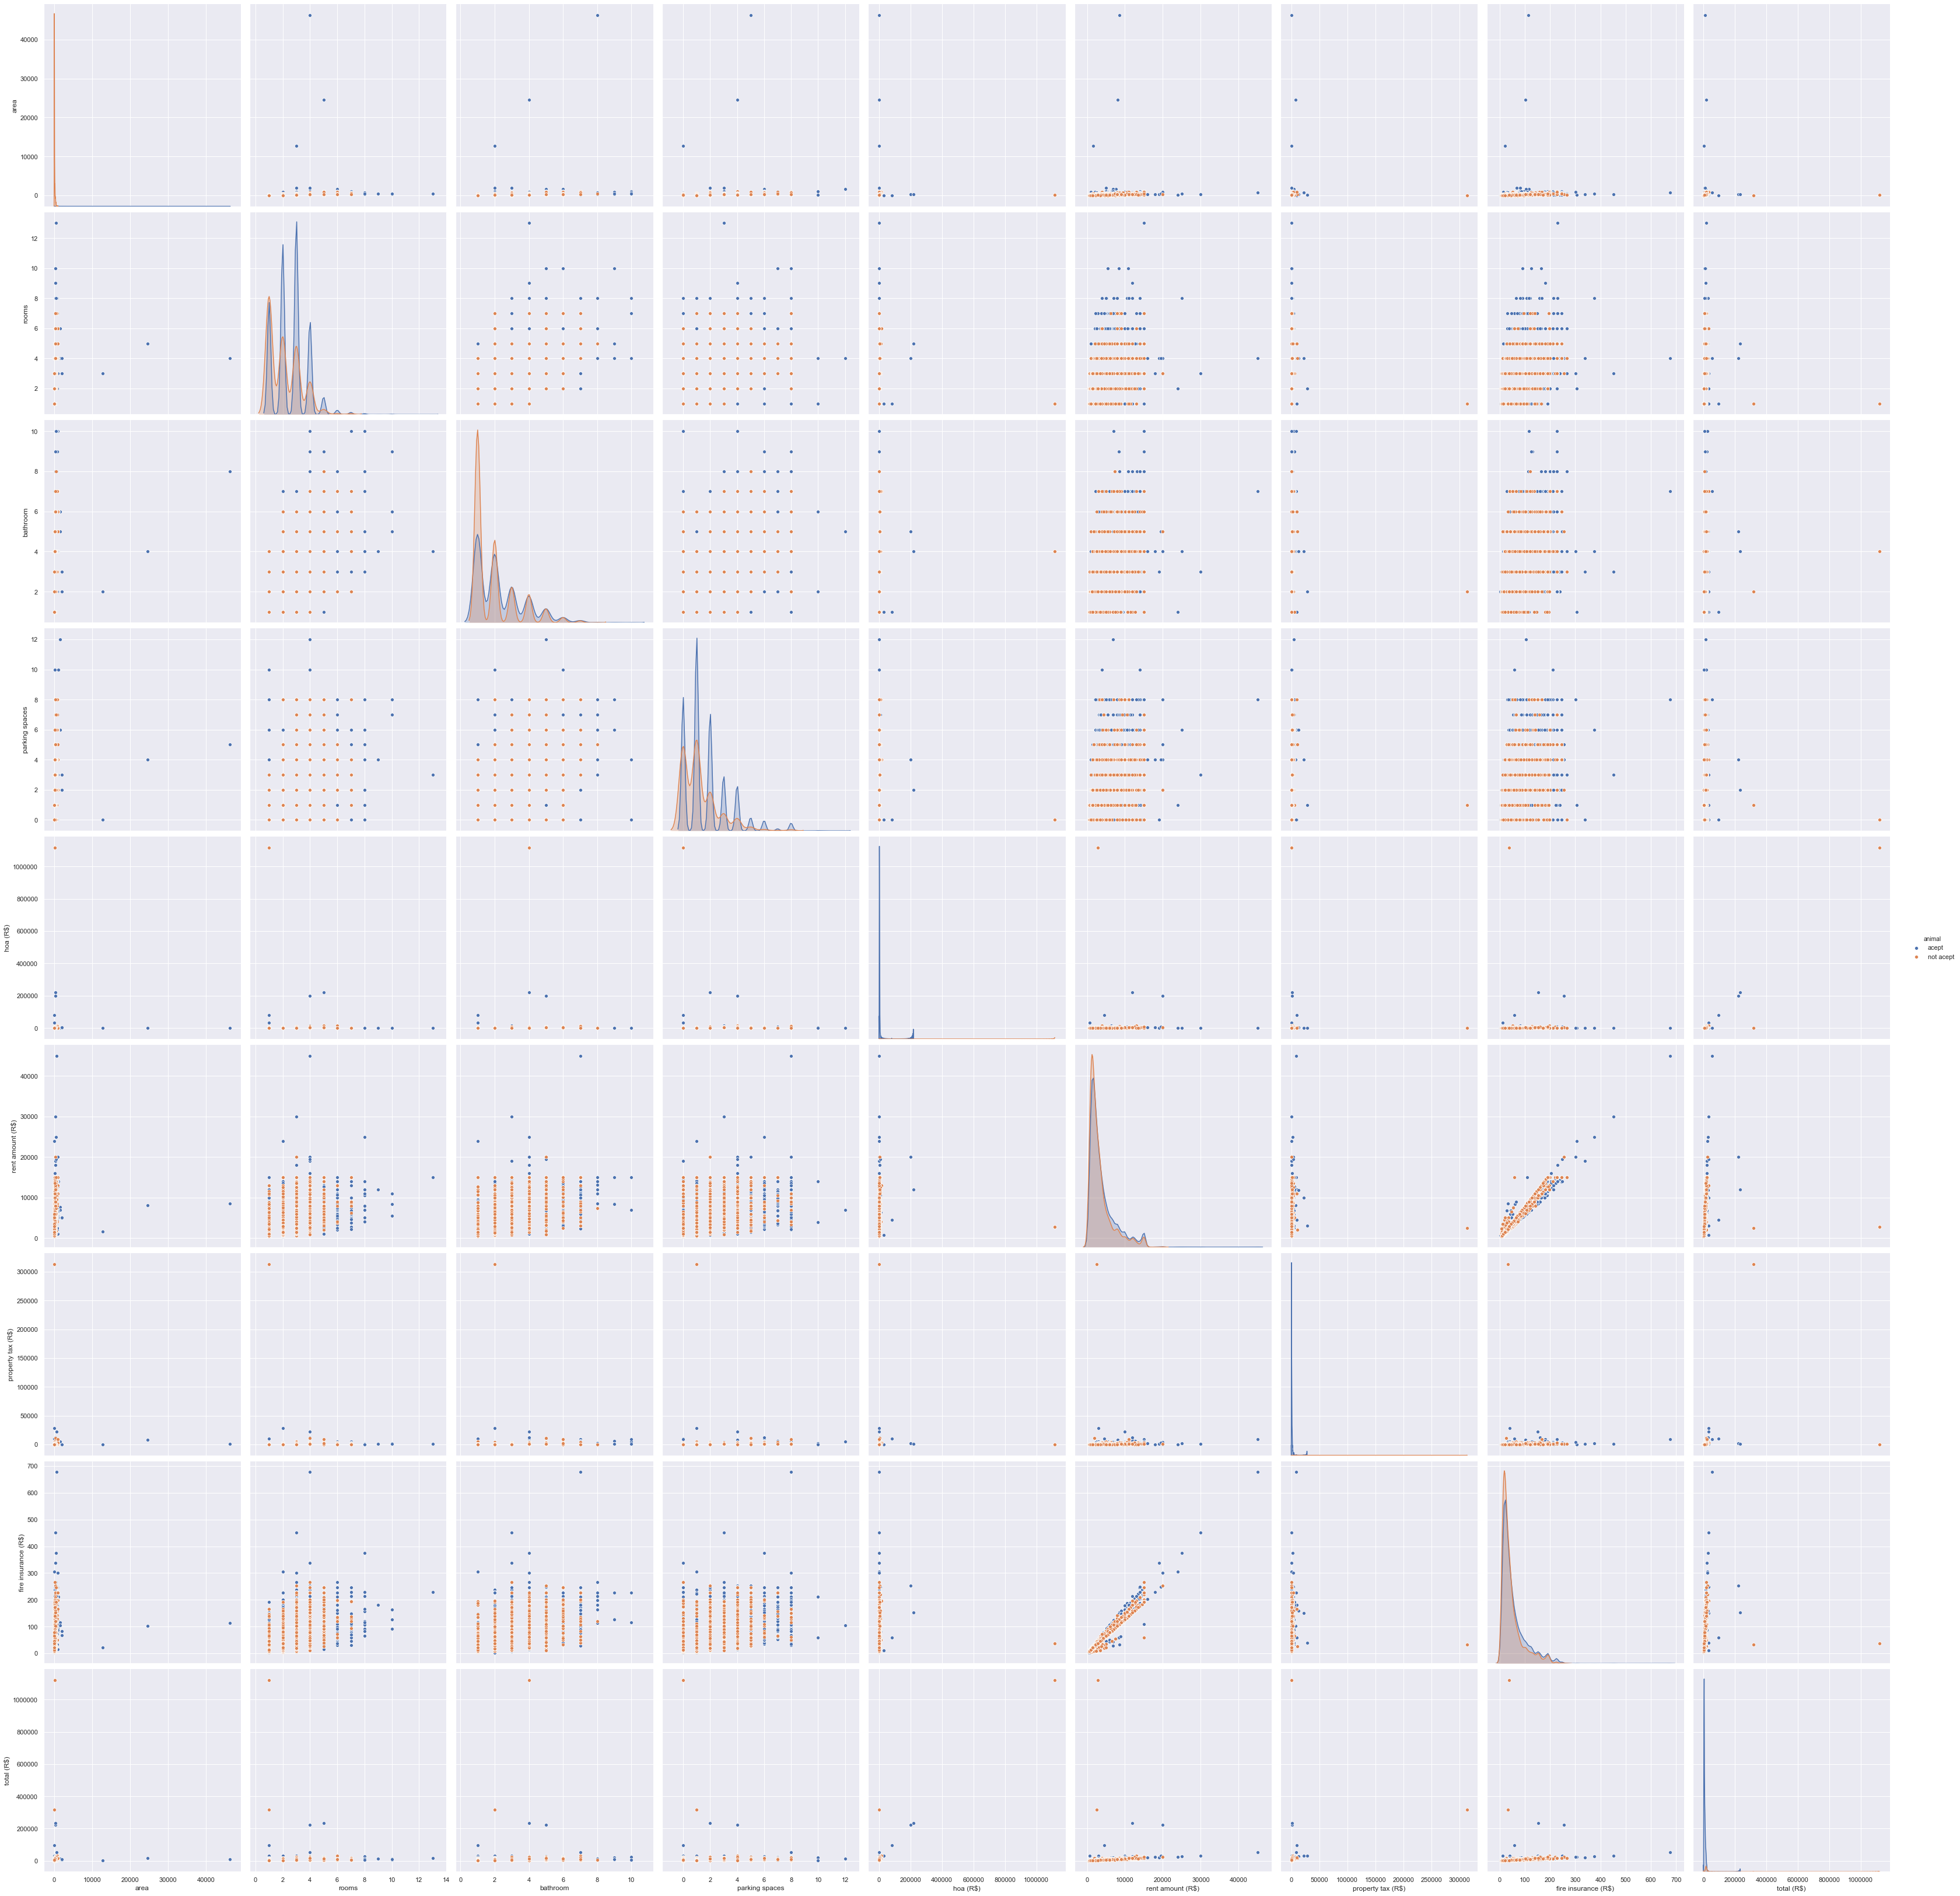

<Figure size 432x288 with 0 Axes>

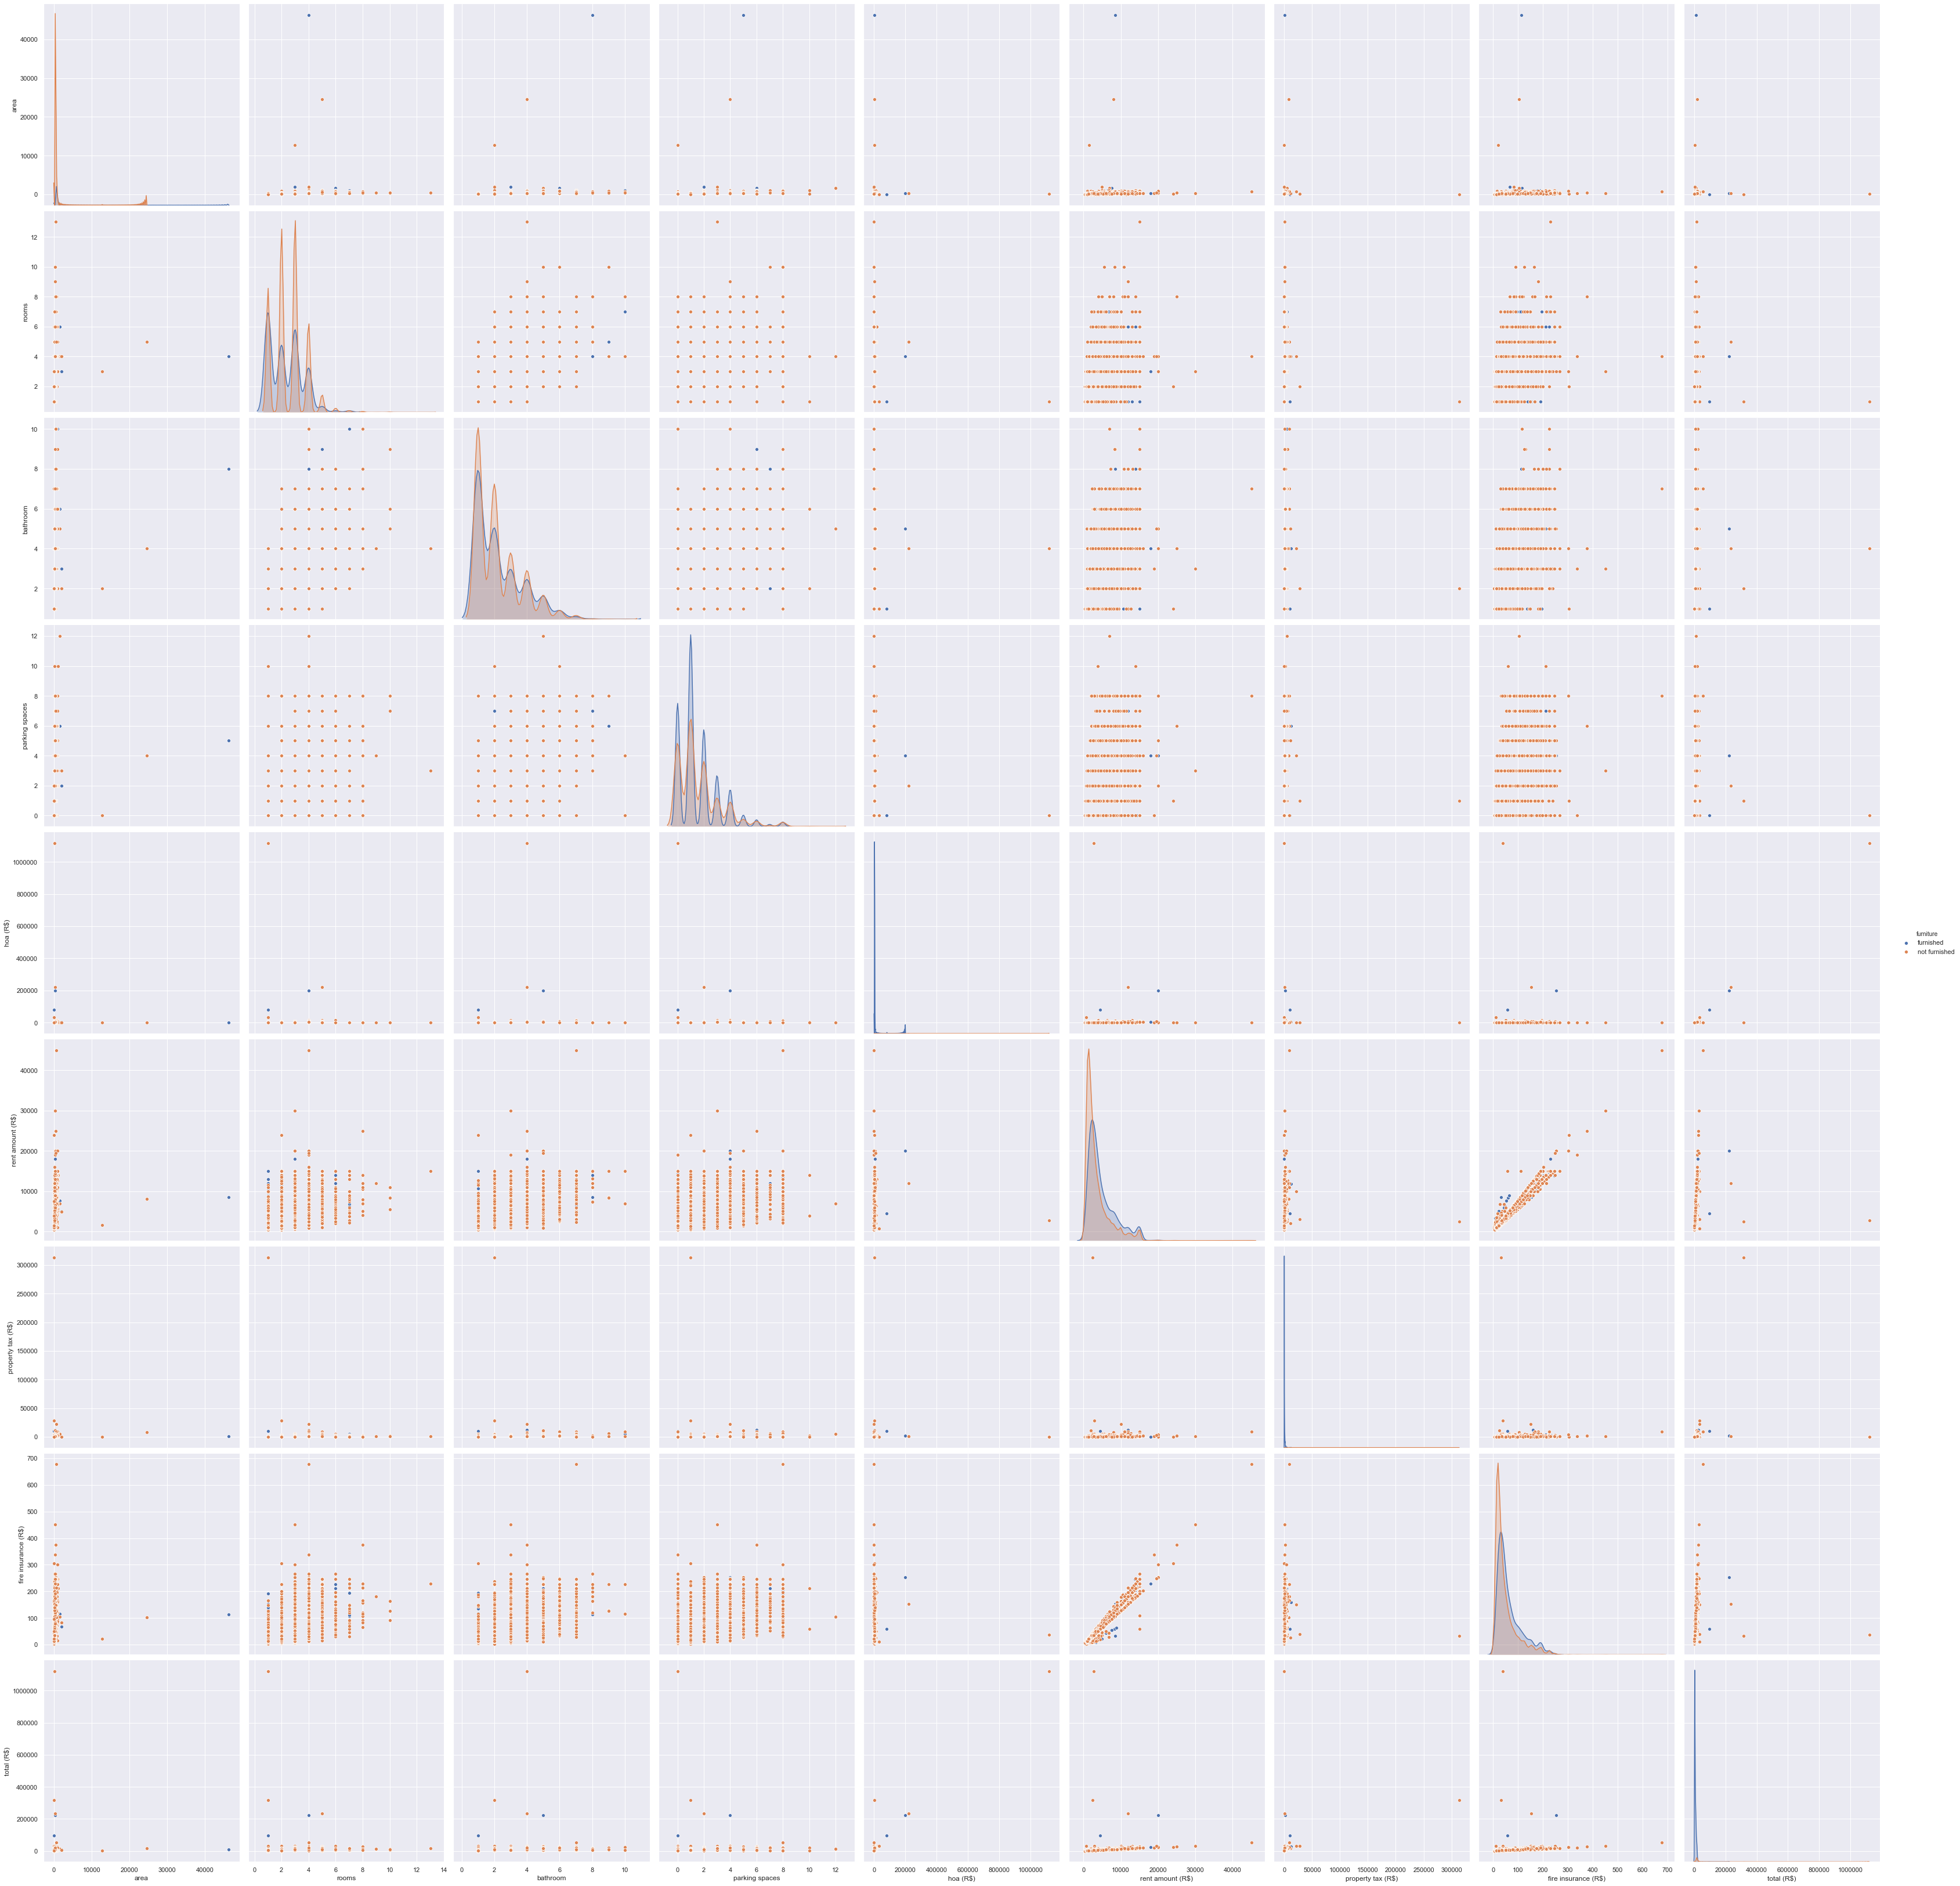

In [254]:
cat_col = ['city','animal','furniture']
for col in cat_col:
    sns.set()
    cols = ['city','area','rooms','bathroom','parking spaces','floor','animal','furniture','hoa (R$)','rent amount (R$)','property tax (R$)','fire insurance (R$)','total (R$)']
    plt.figure()
    sns.pairplot(data[cols],size=5.0,hue=col)
    plt.show()

In [71]:
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [75]:
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [74]:
data['floor'] = data['floor'].astype(int)

In [84]:
data3 = data[data['city'] == 'Porto Alegre']
data1 = data[data['city'] == 'Rio de Janeiro']
data2 = data[data['city'] == 'Campinas']
data4 = data[data['city'] == 'São Paulo']
data5 = data[data['city'] == 'Belo Horizonte']

In [87]:
data2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
28,Campinas,208,3,2,4,0,acept,not furnished,0,3180,100,48,3328
48,Campinas,250,3,3,2,1,acept,not furnished,2200,1700,256,22,4178
49,Campinas,48,1,1,1,2,acept,furnished,505,1600,59,21,2185


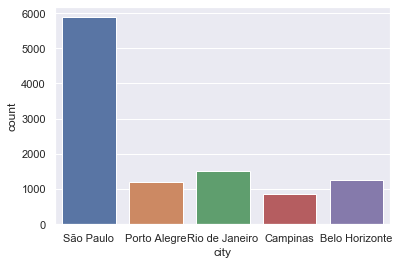

In [83]:
y = data.city
ax = sns.countplot(y,label="Count") 


In [133]:
average1 = data1.mean(axis=0)
average2 = data2.mean(axis=0)
average3 = data3.mean(axis=0)
average4 = data4.mean(axis=0)
average5 = data5.mean(axis=0)

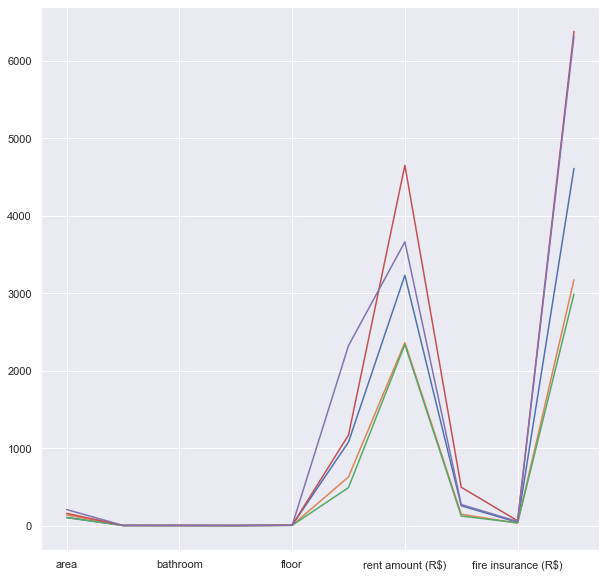

In [165]:
average1.plot(figsize=(10,10))
average2.plot(figsize=(10,10))
average3.plot(figsize=(10,10))
average4.plot(figsize=(10,10))
average5.plot(figsize=(10,10))
plt.show()
#Plot of averages city wise

In [141]:
mean1 = average1.to_frame() 
mean1 =mean1.rename(columns={0: 'Rio de Janeiro'})
mean2 = average2.to_frame() 
mean2 = mean2.rename(columns={0: 'Campinas'})
mean3 = average3.to_frame()
mean3 = mean3.rename(columns={0: 'Porto Alegre'}) 
mean4 = average4.to_frame() 
mean4 = mean4.rename(columns={0: 'Sao Paulo'}) 
mean5 = average5.to_frame()
mean5 = mean5.rename(columns={0: 'Belo Horizonte'})

In [142]:
result = pd.concat([mean1, mean2,mean3,mean4,mean5], axis=1, sort=False)
result
#averages table

,Rio de Janeiro,Campinas,Porto Alegre,Sao Paulo,Belo Horizonte
area,105.347768,137.561547,103.609388,158.899439,207.411765
rooms,2.243837,2.355217,2.140821,2.558859,3.020668
bathroom,1.756163,1.960141,1.725901,2.467641,2.402226
parking spaces,0.744171,1.558030,1.044426,1.877527,1.955485
floor,5.250500,4.280188,3.918692,5.626465,3.860890
hoa (R$),1079.432378,628.922626,491.618609,1169.627994,2324.197138
rent amount (R$),3232.904064,2364.290739,2337.699916,4652.793783,3664.127981
property tax (R$),256.853431,147.657679,124.021794,495.701716,272.782194
fire insurance (R$),42.483011,32.388042,36.425817,62.428911,53.675676
total (R$),4611.684877,3173.276671,2989.782900,6380.831833,6315.242448


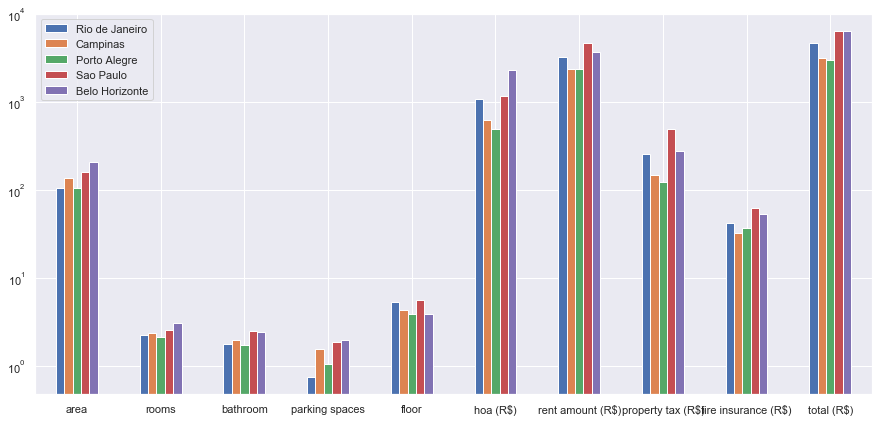

In [143]:
ax = result.plot.bar(rot=0,logy=True,figsize=(15,7))
#scaled y axis for better comparison
#comparison of averages through a bar graph

In [151]:
mode1 = data1.mode(axis=0).T
mode1 = mode1.rename(columns={0: 'Rio de Janeiro'})
mode2 = data2.mode(axis=0).T
mode2 = mode2.rename(columns={0: 'Campinas'})
mode3 = data3.mode(axis=0).T
mode3 = mode3.rename(columns={0: 'Porto Alegre'})
mode4 = data4.mode(axis=0).T
mode4 = mode4.rename(columns={0: 'Sao Paulo'})
mode5 = data5.mode(axis=0).T
mode5 = mode5.rename(columns={0: 'Belo Horizonte'})


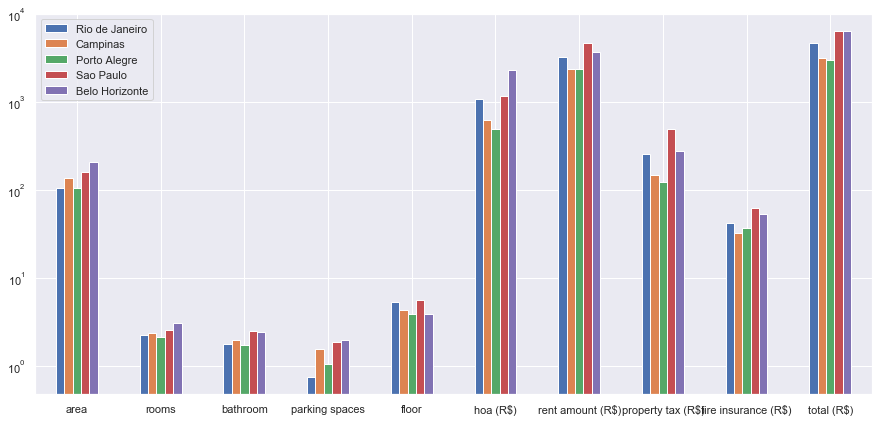

In [158]:
ax = result.plot.bar(rot=0,logy=True,figsize=(15,7))
#scaled y axis for better comparison
#comparison of modes

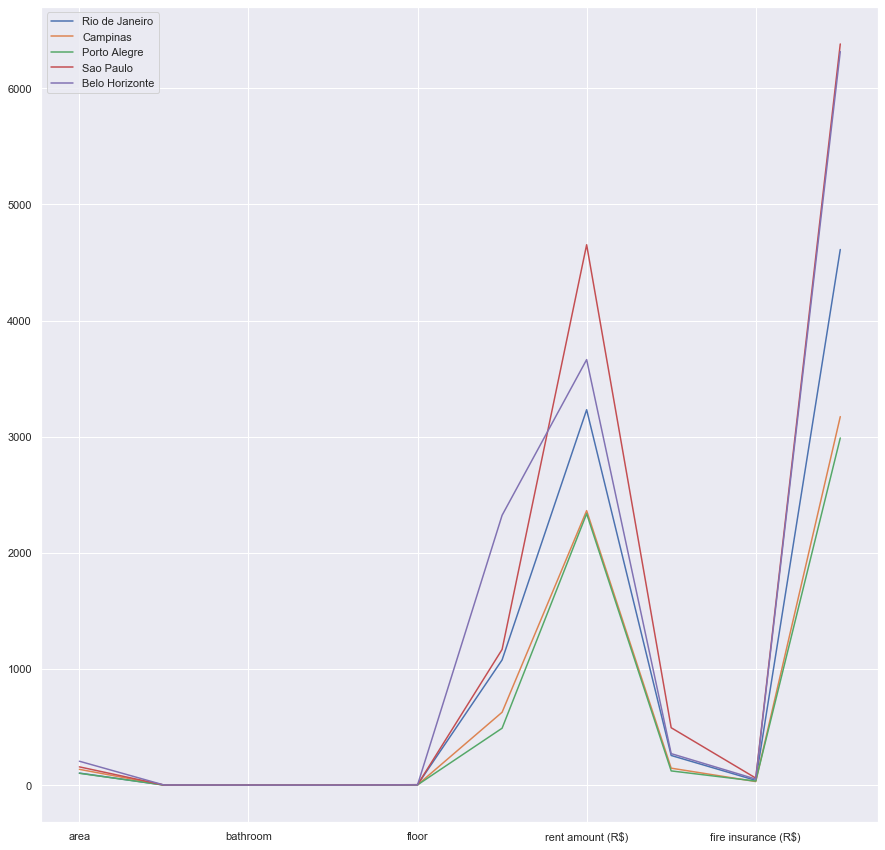

In [168]:
ax = result.plot(rot=0,figsize=(15,15))
#comparison of mode values

In [169]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
data['city']= le.fit_transform(data['city']) 
data['furniture']= le.fit_transform(data['furniture']) 
data['animal']= le.fit_transform(data['animal']) 

In [170]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,2,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836


In [227]:
y = data["rent amount (R$)"]
X = data[['city','area','rooms','bathroom','parking spaces','floor','animal','fire insurance (R$)','furniture','hoa (R$)','property tax (R$)','total (R$)']]

(array([0]), <a list of 1 Text xticklabel objects>)

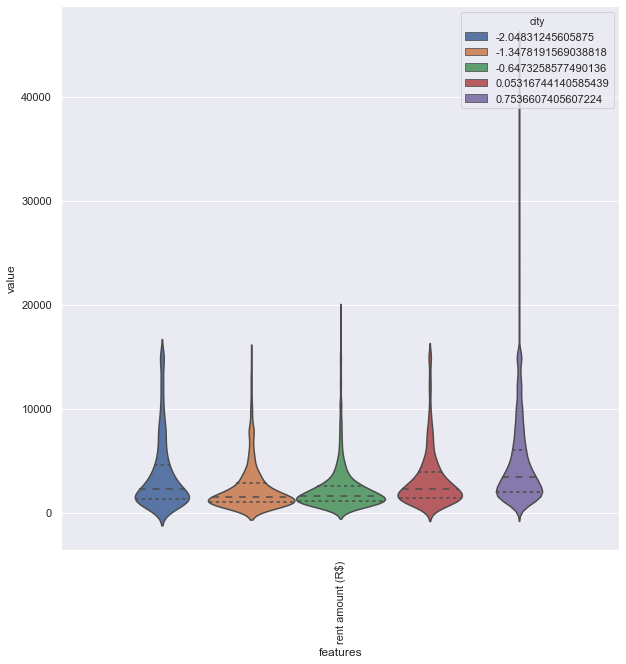

In [256]:
data_dia = y.copy()
data = X[['city']]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:1000]],axis=1)
data = pd.melt(data,id_vars="city",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="city", data=data, inner="quart")
plt.xticks(rotation=90)

In [228]:
X_train = X[0:10000]
y_train = y[0:10000]
X_test = X[10000:]
y_test = y[10000:]

In [229]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [230]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [231]:
y_pred = regressor.predict(X_test)

In [232]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
10000,3080,3079.700658
10001,1100,1099.806395
10002,2100,2099.942328
10003,1990,1989.670475
10004,3200,3199.721197
...,...,...
10687,1478,1478.158977
10688,15000,14995.367381
10689,6000,5999.998230
10690,12000,12000.540369


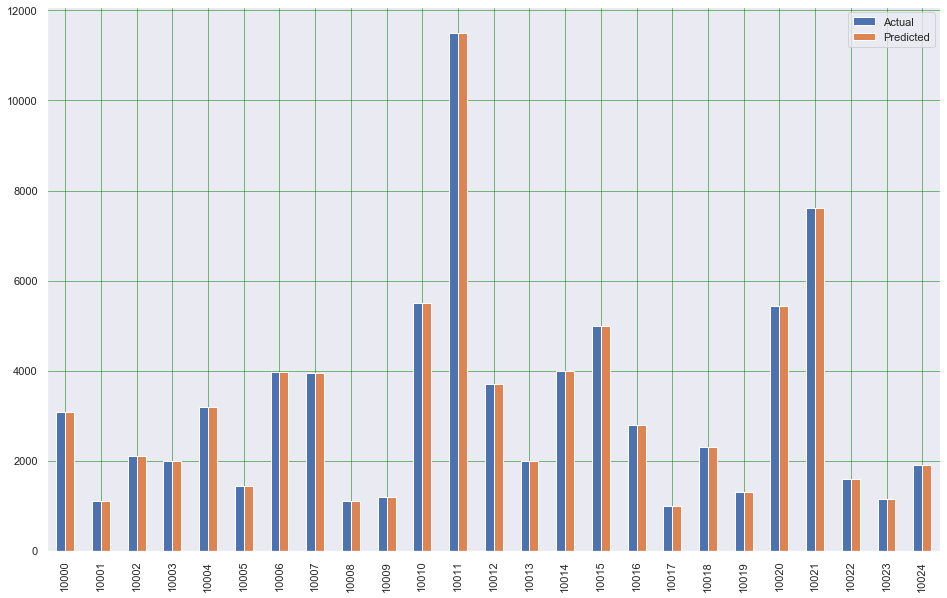

In [233]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [234]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.48689941026253786
Mean Squared Error: 1.147121262050625
Root Mean Squared Error: 1.0710374699564087


In [203]:
y_test.mean()

3958.0173410404623

In [236]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [-4.07467608e-03 -2.70728856e-05  7.52962285e-02 -3.97104436e-02
 -3.30780505e-03  1.61893437e-02  1.49087622e-01 -9.91415727e-01
 -1.54869412e-01 -9.99955008e-01 -9.99787327e-01  9.99857895e-01]


In [235]:
import statsmodels.api as sm # import statsmodels 

X = X_train 
y = y_train 
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rent amount (R$)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.423e+08
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        20:25:27   Log-Likelihood:                -32616.
No. Observations:               10000   AIC:                         6.526e+04
Df Residuals:                    9987   BIC:                         6.535e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1071      0.252     -0.425      0.671      -0.602       0.387
city                   -0.0041      0.047     -0.086      0.931      -0.096       0.088
area                -2.707e-05      0.000     -0.231      0.817      -0.000       0.000
rooms                   0.0753      0.085      0.888      0.375      -0.091       0.242
bathroom               -0.0397      0.081     -0.493      0.622      -0.198       0.118
parking spaces         -0.0033      0.059     -0.056      0.955      -0.119       0.112
floor                   0.0162      0.011      1.449      0.147      -0.006       0.038
animal                  0.1491      0.156      0.958      0.338      -0.156       0.454
fire insurance (R$)    -0.9914      0.010   -103.910      0.000      -1.010      -0.973
furniture              -0.1549      0.154     -1.008      0.314      -0.456       0.146
hoa (R$)               -1.0000      0.000  -7588.961      0.000      -1.000      -1.000
property tax (R$)      -0.9998      0.000  -7499.995      0.000      -1.000      -1.000
total (R$)              0.9999      0.000   7601.597      0.000       1.000       1.000
==============================================================================
Omnibus:                    31716.064   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3286909250.382
Skew:                         -51.104   Prob(JB):                         0.00
Kurtosis:                    2809.802   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that the coefficients obtained through stats model and sklearn match almost exactly, which is good for our model.